In [39]:
import os, glob
import pandas as pd
from tqdm.notebook import tqdm

import seaborn as sns
sns.set(style='darkgrid')

from transformers import LongformerTokenizerFast


# Class Distribution Analysis

In [2]:
def from_chunks_to_analysis():
    files = glob.glob('../data/refined_patents/chunks/*.csv')
    df = pd.DataFrame(columns=['labels', 'ipc_class', 'subclass'])
    progress_bar = tqdm(range(len(files)))
    for file in files:
        data = pd.read_csv(file, usecols=['labels', 'ipc_class', 'subclass'])
        df = pd.concat([df, data])
        progress_bar.update(1)
    return df

In [3]:
df = from_chunks_to_analysis()

  0%|          | 0/315 [00:00<?, ?it/s]

In [4]:
df

,labels,ipc_class,subclass
0,0,47,J
1,0,63,C
2,0,61,L
3,0,61,K
4,0,61,M
...,...,...,...
155,7,3,M
156,7,4,M
157,7,4,L
158,7,4,W


In [5]:
# ID to letter representation of labels
id2label = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H"}
df['labels'] = df['labels'].apply(lambda x: id2label[x])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205396 entries, 0 to 159
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   labels     205396 non-null  object
 1   ipc_class  205396 non-null  object
 2   subclass   205395 non-null  object
dtypes: object(3)
memory usage: 6.3+ MB


In [7]:
df.describe()

,labels,ipc_class,subclass
count,205396,205396,205395
unique,8,116,26
top,A,1,B
freq,25677,33530,47011


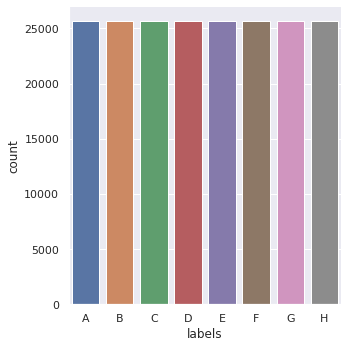

In [8]:
# Perpectly balanced data.
sns.catplot(data=df, x="labels", kind="count", order=["A","B","C","D","E","F","G","H"])

# Textual Analysis

In [32]:
# Collects all of the patent documents along with their id and class info into a dataframe.

def collect_chunks(count=None):
    files = glob.glob('../data/refined_patents/chunks/*.csv')
    df = pd.DataFrame(columns=['patent_id', 'text', 'labels', 'ipc_class', 'subclass'])

    if not count:
        count = len(files)

    for file in tqdm(files[:count]):
        data = pd.read_csv(file)
        df = pd.concat([df, data], ignore_index=True)
    return df

In [96]:
df = collect_chunks()

  0%|          | 0/315 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [34]:
df.describe()

,patent_id,text,labels,ipc_class,subclass
count,205396,205396,205396,205396,205395
unique,205396,205090,8,116,26
top,4974501,detailed description of the preferred embodime...,0,1,B
freq,1,9,25677,33530,47011


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205396 entries, 0 to 205395
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   patent_id  205396 non-null  object
 1   text       205396 non-null  object
 2   labels     205396 non-null  object
 3   ipc_class  205396 non-null  object
 4   subclass   205395 non-null  object
dtypes: object(5)
memory usage: 7.8+ MB


In [92]:
#Convert ids to their corresponding lables for readibility.

df.replace({'labels':{0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H"}}, inplace=True) 

In [93]:
tokenizer = LongformerTokenizerFast.from_pretrained('allenai/longformer-base-4096', max_length=4096)

In [94]:
tokens = tokenizer.convert_ids_to_tokens(tokenizer(df.loc[0]['text'], padding='max_length', truncation=True)['input_ids'])